## Importación de librerías

In [1]:
# Importación de librerías
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)  # Para visualizar todas las columnas de los DataFrames

## Carga de datos

In [2]:
df = pd.read_csv("dataset_estudiantes.csv", index_col = 0)

df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
horas_estudio_semanal,,,,,,,,,,
8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


## Análisis exploratorio

In [3]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 1000, y el número de columnas es 10


In [4]:
df.columns

Index(['nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad',
       'nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje', 'nota_final', 'aprobado'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 8.957475998038344 to 4.968947416773296
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nota_anterior              1000 non-null   float64
 1   tasa_asistencia            1000 non-null   float64
 2   horas_sueno                850 non-null    float64
 3   edad                       1000 non-null   int64  
 4   nivel_dificultad           1000 non-null   object 
 5   tiene_tutor                1000 non-null   object 
 6   horario_estudio_preferido  900 non-null    object 
 7   estilo_aprendizaje         950 non-null    object 
 8   nota_final                 1000 non-null   float64
 9   aprobado                   1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 85.9+ KB


## Descripción de las columnas

- **`horas_estudio_semanal`**: Número de horas de estudio a la semana (variable numérica, aprox. entre 1 y 25 horas).

- **`nota_anterior`**: Nota que obtuvo el alumno en la convocatoria anterior, en escala numérica (aprox. 30 a 100).

- **`tasa_asistencia`**: Tasa de asistencia a clase en porcentaje (aprox. 20 a 100).

- **`horas_sueno`**: Promedio de horas que duerme el alumno al día (variable numérica, aprox. 4 a 10).

- **`edad`**: Edad del alumno (entero, aprox. 18 a 29).

- **`nivel_dificultad`**: Dificultad del alumno para el estudio (categórica), con valores como `"Fácil"`, `"Medio"`, `"Difícil"`.

- **`tiene_tutor`**: Indica si el alumno tiene tutor o no (categórica), con valores `"Sí"` o `"No"`.

- **`horario_estudio_preferido`**: Horario de estudio preferido por el alumno (categórica), con valores como `"Mañana"`, `"Tarde"`, `"Noche"`.

- **`estilo_aprendizaje`**: Forma de estudio que emplea el alumno (categórica), con valores como `"Visual"`, `"Auditivo"`, `"Kinestésico"`, `"Lectura/Escritura"`.

- **`nota_final`**: Calificación final obtenida por el estudiante (variable continua entre 0 y 100).

- **`aprobado`**: Variable objetivo binaria que indica si el estudiante aprueba (`1`) o no aprueba (`0`).


## Identificación de duplicados

Comprobemos ahora si existen duplicados a lo largo de todo el dataframe

In [26]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

## Identificación de nulos

In [10]:
df.isna().sum()

nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

### Identificar variables numéricas y categóricas

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad', 'nota_final',
       'aprobado'],
      dtype='object')

Variables categóricas:

 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [12]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


### Visualizaciones

Graficar histogramas para variables numéricas

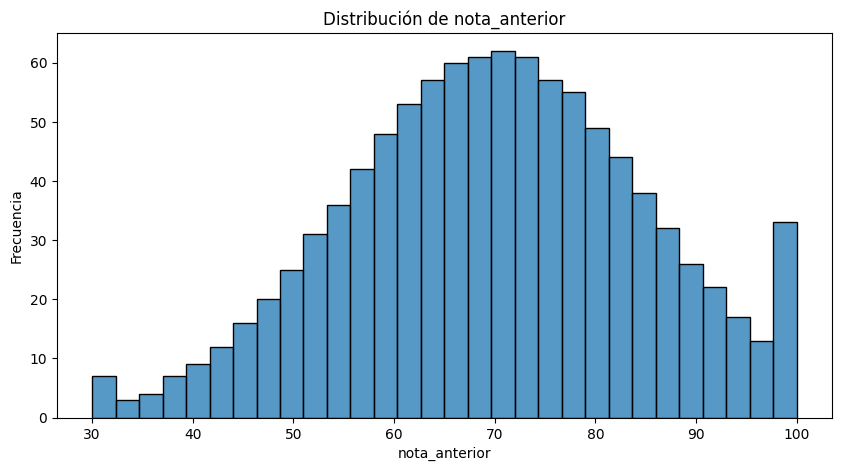

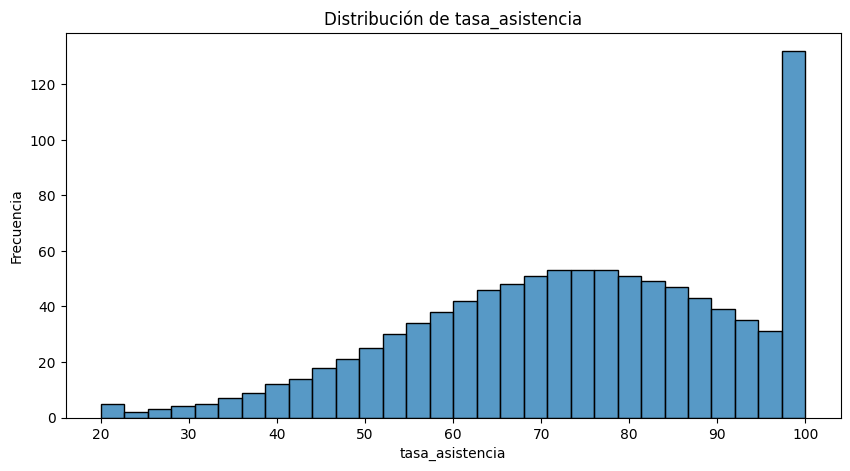

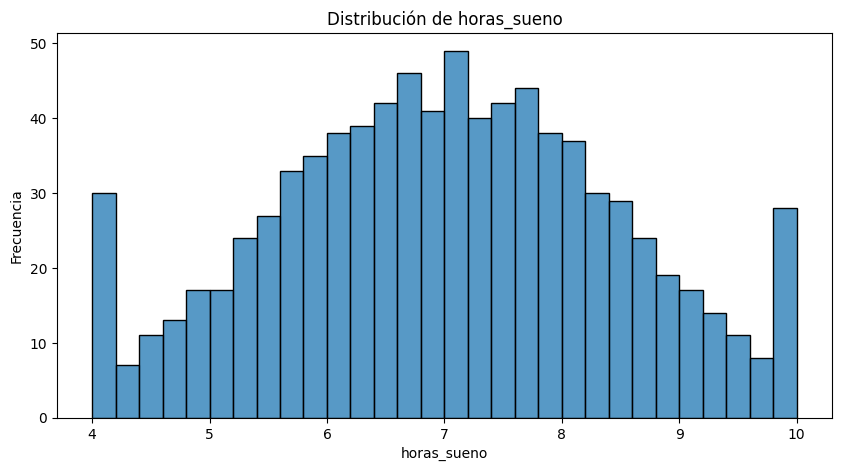

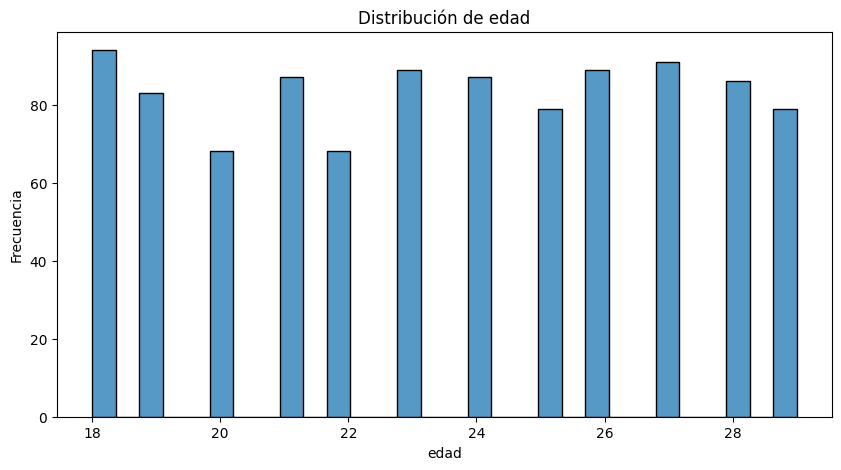

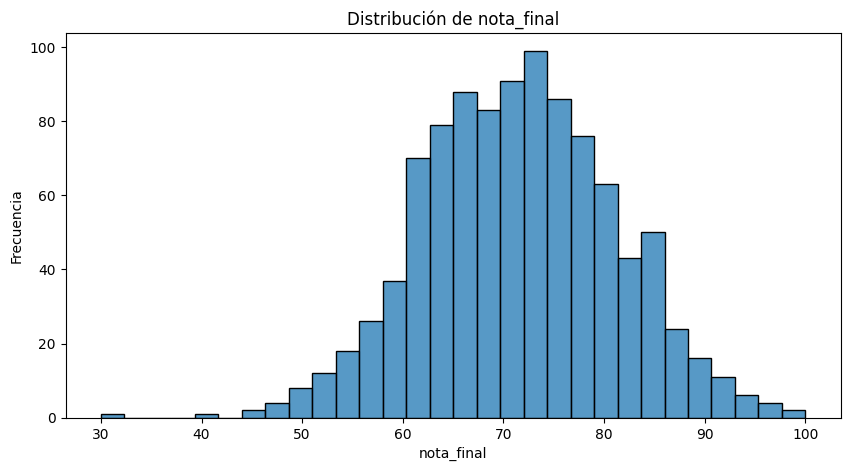

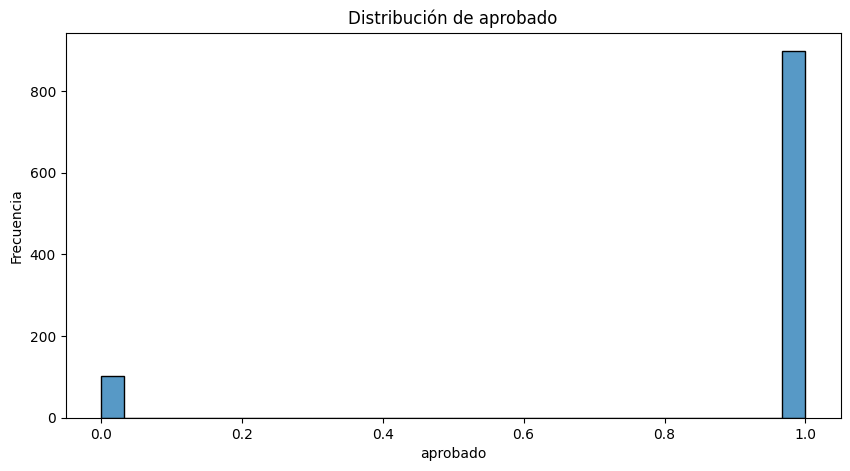

In [13]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

## Variables categóricas

### Estadísticas descriptivas

In [14]:
df.describe(include = "object").T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


### Valores únicos y frecuencias

In [15]:
for col in cat_cols:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{col}' -----------\n")
    print(f"Valores únicos: {df[col].unique()}\n")
    print("Frecuencias de los valores únicos de las categorías:")
    display(df[col].value_counts())

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'nivel_dificultad' -----------

Valores únicos: ['Fácil' 'Difícil' 'Medio']

Frecuencias de los valores únicos de las categorías:


nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'tiene_tutor' -----------

Valores únicos: ['Sí' 'No']

Frecuencias de los valores únicos de las categorías:


tiene_tutor
No    597
Sí    403
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'horario_estudio_preferido' -----------

Valores únicos: ['Tarde' 'Mañana' nan 'Noche']

Frecuencias de los valores únicos de las categorías:


horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
Name: count, dtype: int64

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'estilo_aprendizaje' -----------

Valores únicos: ['Lectura/Escritura' nan 'Visual' 'Auditivo' 'Kinestésico']

Frecuencias de los valores únicos de las categorías:


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
Name: count, dtype: int64

### Visualizaciones

Graficar gráficos de barras para variables categóricas

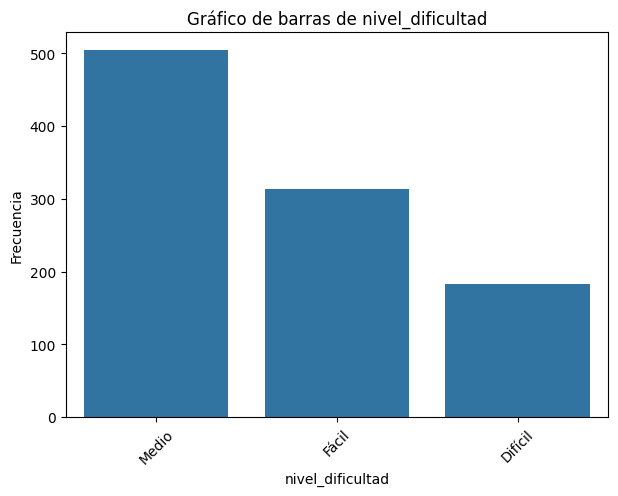

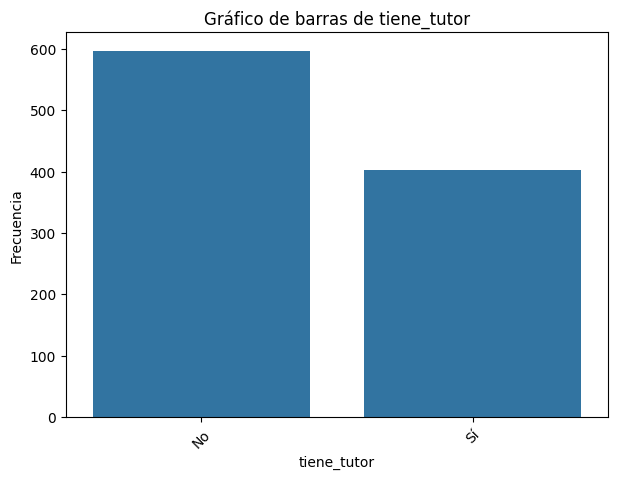

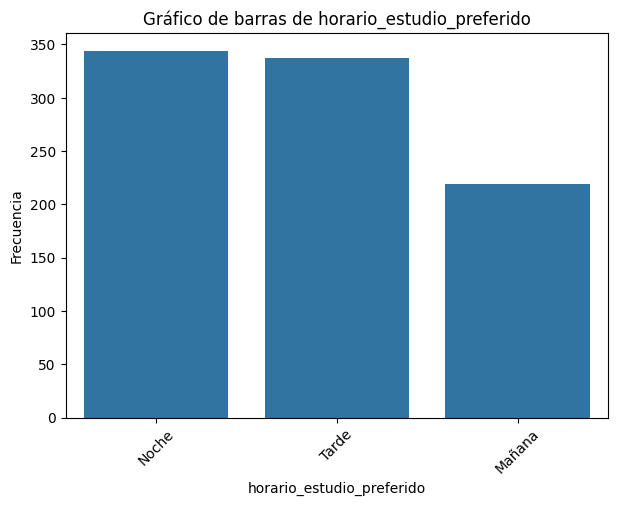

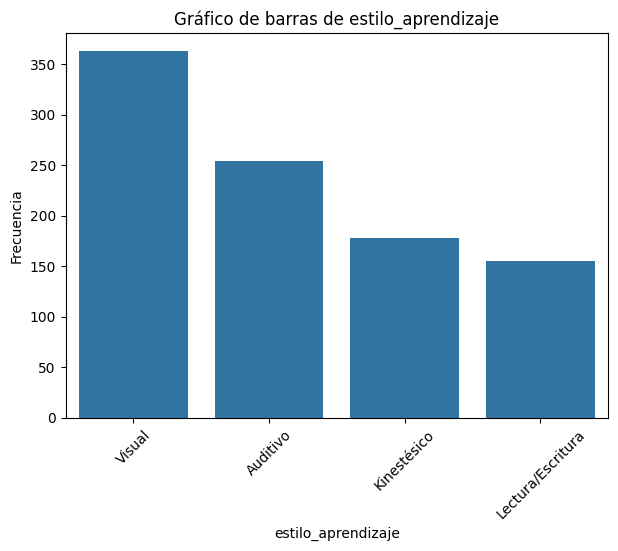

In [20]:
df_plot = df.reset_index(drop=True)

for col in cat_cols:
    num_categories = df_plot[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5

    plt.figure(figsize=(width, height))
    sns.countplot(x=df_plot[col], order=df_plot[col].value_counts().index)
    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

---

---

## Matriz de correlación

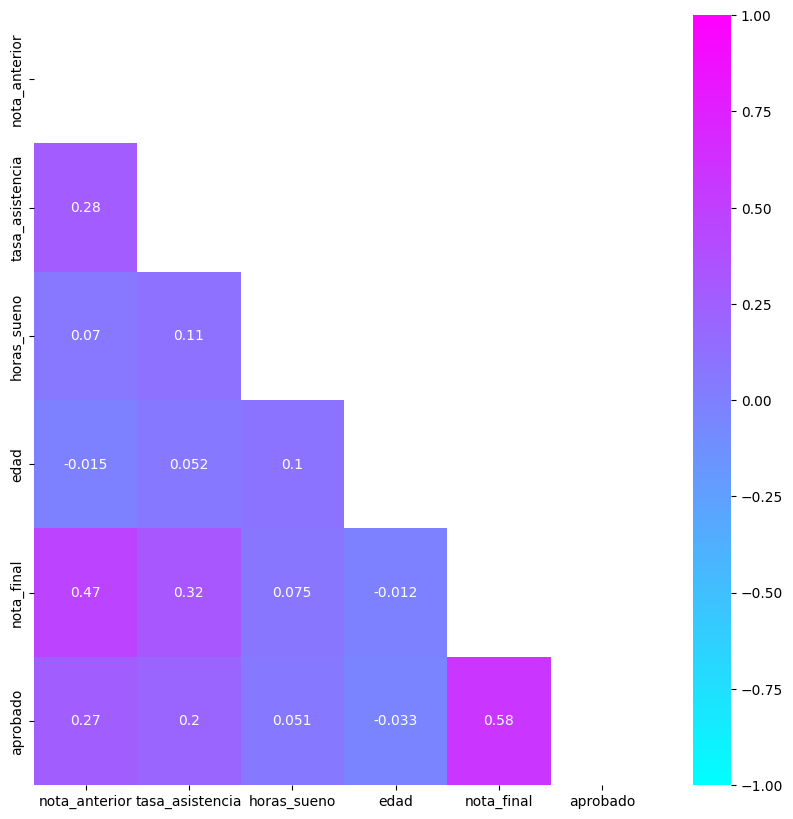

In [21]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear la figura
plt.figure(figsize=(10, 10))

# Crear una máscara para mostrar solo la parte triangular
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar el mapa de calor
sns.heatmap(corr_matrix, 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            mask=mask,
            cmap='cool')

plt.show()

## Relaciones cruzadas

### Variable objetivo numérica `nota_final`

Generamos gráficos de dispersión

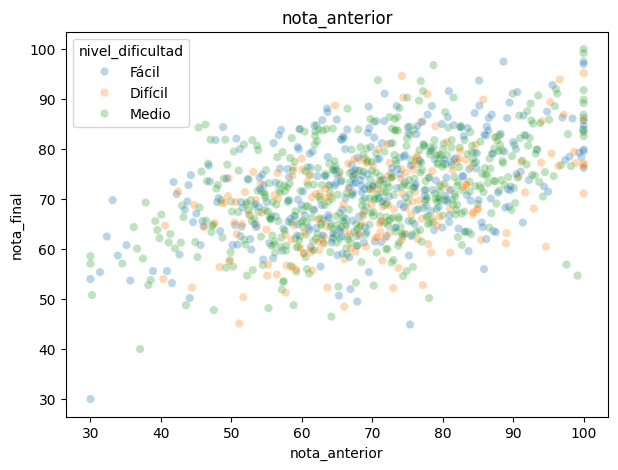

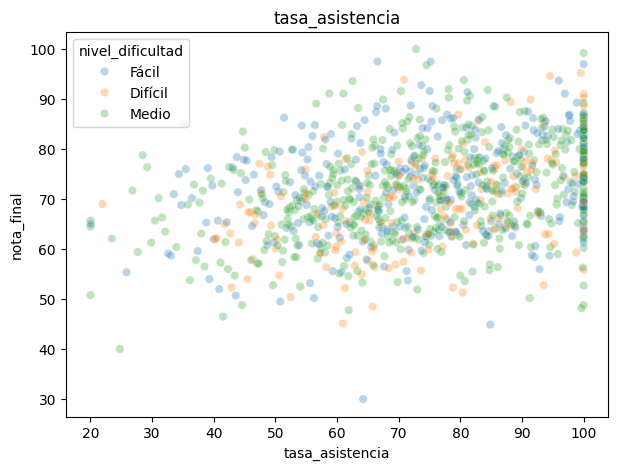

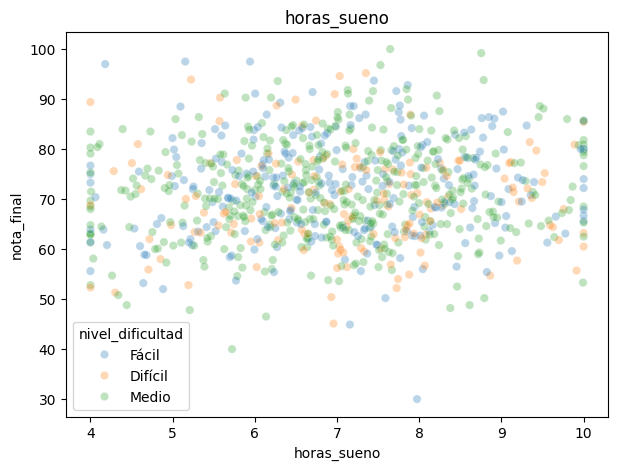

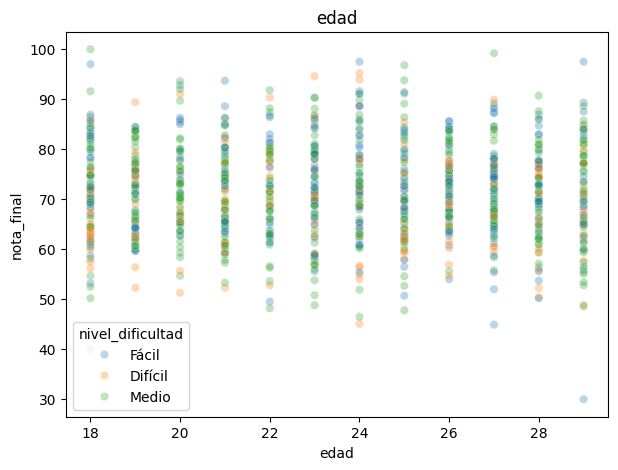

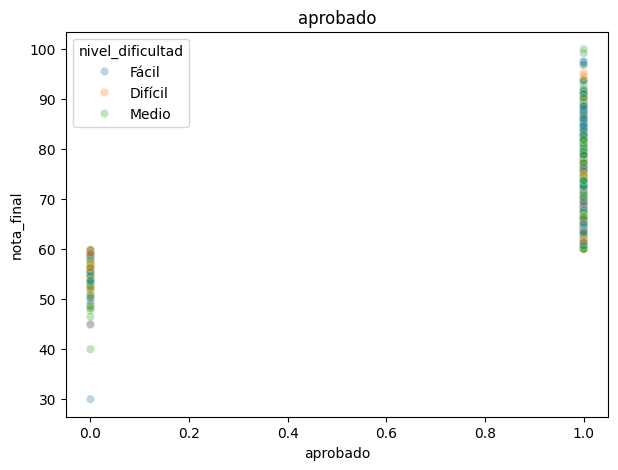

In [33]:
# Definir la variable objetivo
tv = "nota_final"

# Resetear el índice del DataFrame para evitar problemas con los gráficos de dispersión
df_plot = df.reset_index(drop=True)   # <- clave

# Definir DataFrame y variables numéricas
df_num = df_plot.select_dtypes(include=np.number).drop(columns=[tv], errors="ignore")
cols_num = df_num.columns

# Generar gráficos de dispersión
for col in cols_num:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df_plot,
        x=col,
        y=tv,
        hue="nivel_dificultad",
        alpha=0.3
    )
     # sns.scatterplot(x=df[col], y=df[tv])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()


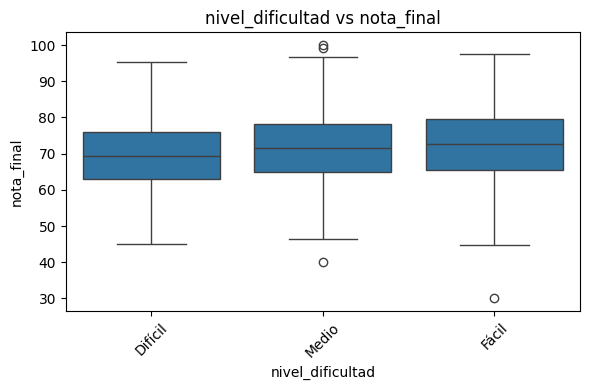

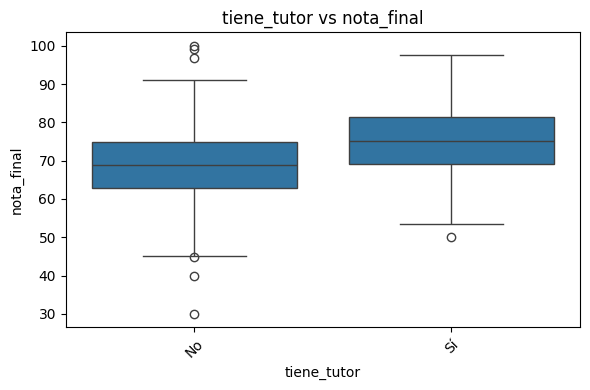

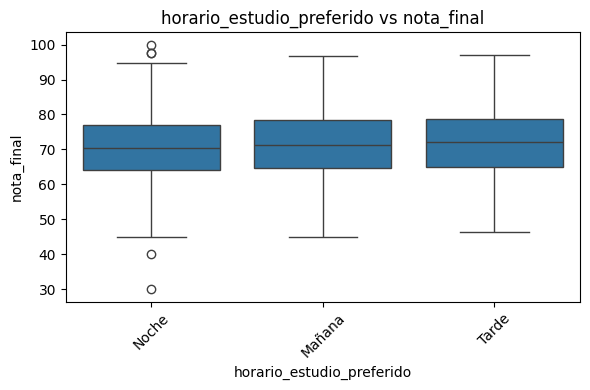

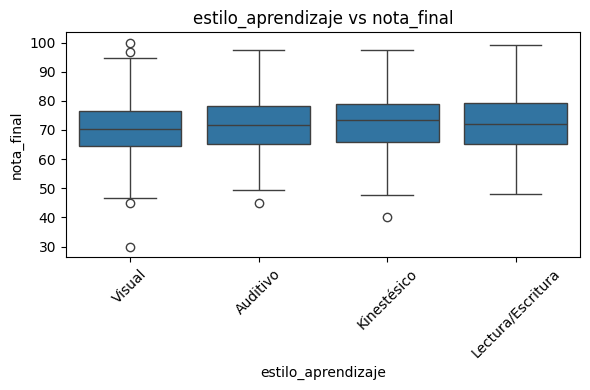

In [46]:
# Generar gráficos independientes para cada variable categórica
df_plot = df.reset_index(drop=True)

# Definir la variable objetivo
tv = "nota_final"

for col in cat_cols:
    # Calcular el número de categorías únicas
    num_cats = df_plot[col].nunique()
    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1.5), 25) # Ancho mínimo de 6, máximo de 25
    fig_height = 4

    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df_plot.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(
        data=df_plot,
        x=col,
        y=tv,
        order=ordered_cats
    )
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Variable objetivo numérica `aprobado`

Generamos gráficos de dispersión

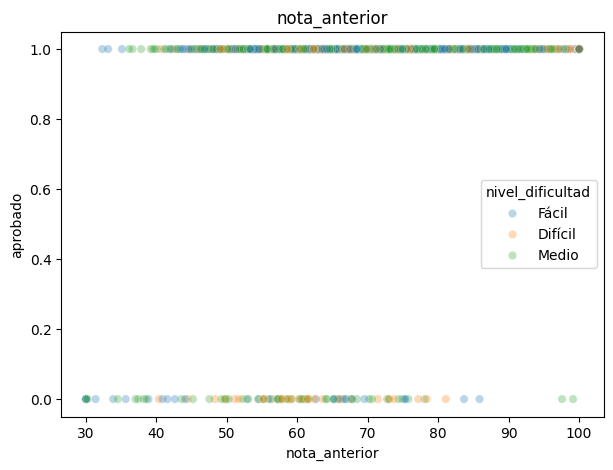

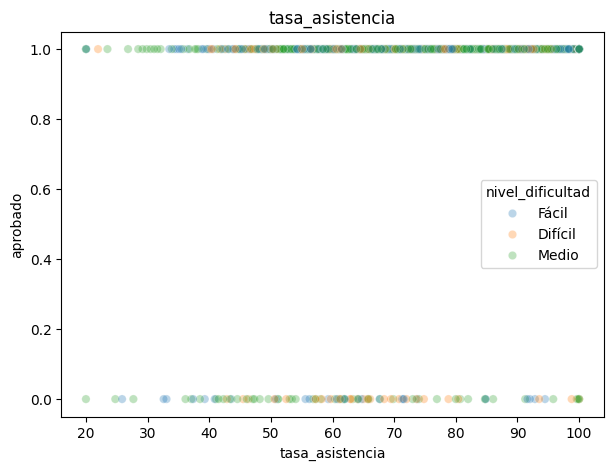

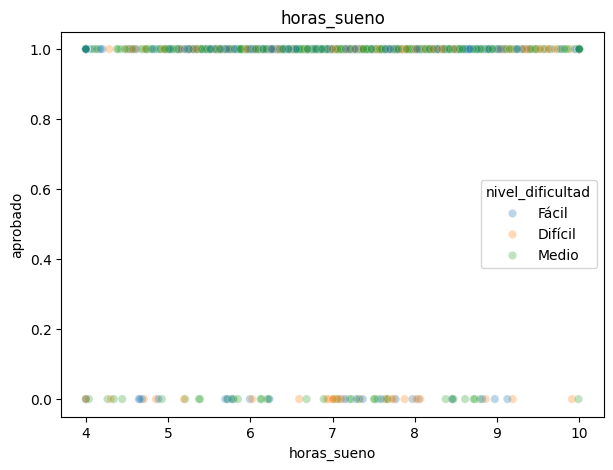

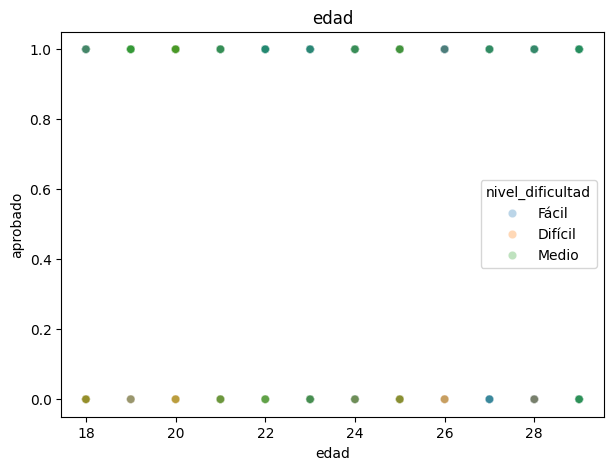

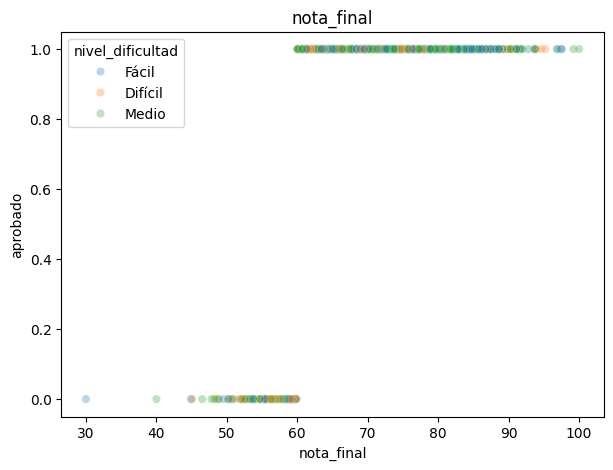

In [47]:
# Definir la variable objetivo
tv = "aprobado"

# Resetear el índice del DataFrame para evitar problemas con los gráficos de dispersión
df_plot = df.reset_index(drop=True)   # <- clave

# Definir DataFrame y variables numéricas
df_num = df_plot.select_dtypes(include=np.number).drop(columns=[tv], errors="ignore")
cols_num = df_num.columns

# Generar gráficos de dispersión
for col in cols_num:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df_plot,
        x=col,
        y=tv,
        hue="nivel_dificultad",
        alpha=0.3
    )
     # sns.scatterplot(x=df[col], y=df[tv])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.show()

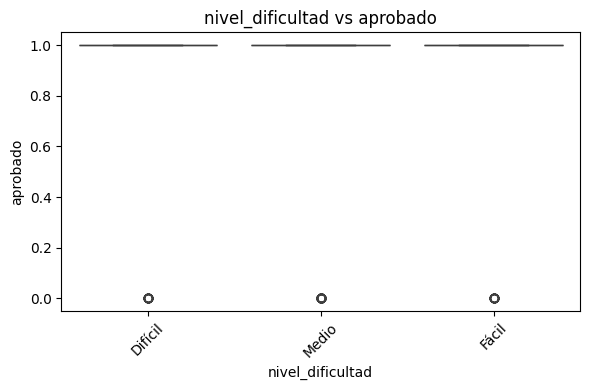

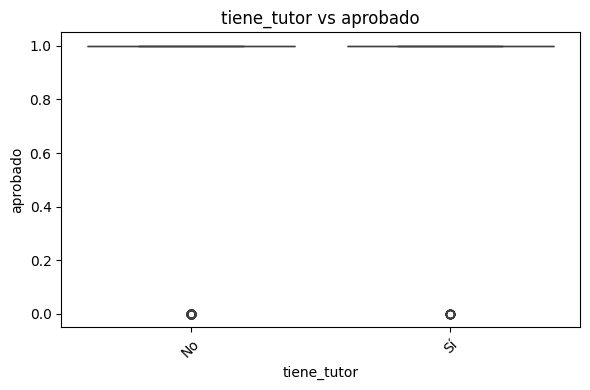

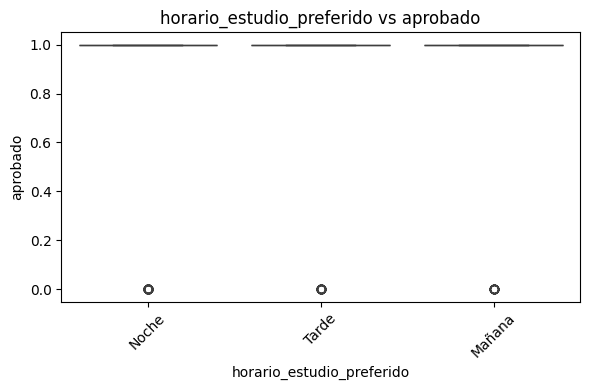

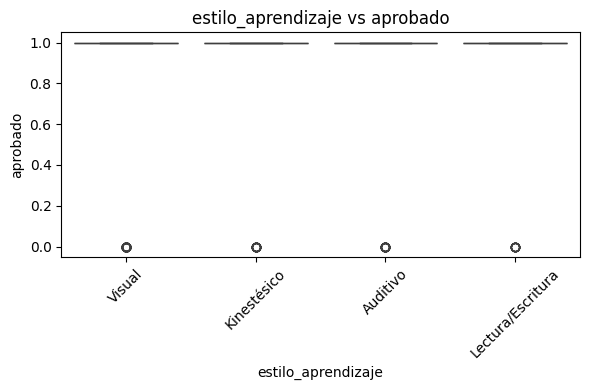

In [48]:
# Generar gráficos independientes para cada variable categórica
df_plot = df.reset_index(drop=True)

# Definir la variable objetivo
tv = "aprobado"

for col in cat_cols:
    # Calcular el número de categorías únicas
    num_cats = df_plot[col].nunique()
    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1.5), 25) # Ancho mínimo de 6, máximo de 25
    fig_height = 4

    # Ordenar las categorías por el promedio de la variable objetivo
    ordered_cats = df_plot.groupby(col)[tv].mean().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(
        data=df_plot,
        x=col,
        y=tv,
        order=ordered_cats
    )
    plt.title(f"{col} vs {tv}")
    plt.xlabel(col)
    plt.ylabel(tv)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Análisis de incosinstencias

In [57]:
inconsistencies = []

# Regla 1: 'nota_final' debe ser coherente con 'aprobado' (>=60 -> 1, <60 -> 0)
mask = df['aprobado'] != (df['nota_final'] >= 60).astype(int)
for i in df.index[mask]:
    inconsistencies.append((i, 'aprobado != (nota_final >= 60)'))

# Regla 2: 'nota_anterior' debe estar entre 0 y 100
mask = (df['nota_anterior'] < 0) | (df['nota_anterior'] > 100)
for i in df.index[mask]:
    inconsistencies.append((i, 'nota_anterior fuera de rango [0,100]'))

# Regla 3: 'tasa_asistencia' debe estar entre 0 y 100
mask = (df['tasa_asistencia'] < 0) | (df['tasa_asistencia'] > 100)
for i in df.index[mask]:
    inconsistencies.append((i, 'tasa_asistencia fuera de rango [0,100]'))

# Regla 4: 'horas_sueno' debe estar entre 0 y 24 (si no es nulo)
mask = df['horas_sueno'].notna() & ((df['horas_sueno'] < 0) | (df['horas_sueno'] > 24))
for i in df.index[mask]:
    inconsistencies.append((i, 'horas_sueno fuera de rango [0,24]'))

# Crear DataFrame de inconsistencias
inconsistencies_df = pd.DataFrame(inconsistencies, columns=['Index', 'Inconsistency'])

# Obtener los índices únicos de las inconsistencias
inconsistent_indices = inconsistencies_df['Index'].unique()

# Filtrar el DataFrame original
df_inconsistent_rows = df.loc[inconsistent_indices]

In [58]:
inconsistencies_df['Inconsistency'].value_counts()

Series([], Name: count, dtype: int64)

In [59]:
df_inconsistent_rows.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
horas_estudio_semanal,,,,,,,,,,


In [61]:
df.drop(columns=['aprobado'], inplace=True)

Guardamos el dataframe de nuevo

In [62]:
df.to_csv('dataset_estudiantes.csv')